In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

C:\Users\mikex\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [2]:
tickers = ['TSLA','AAPL','AMZN','MSFT','BABA','GOOG','0700.HK']
mydata = pd.DataFrame()
start_date = '2016-1-1'
for t in tickers:
    mydata[t] = wb.DataReader(t,data_source='yahoo', start=start_date)['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1184 entries, 2015-12-31 to 2020-09-14
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TSLA     1184 non-null   float64
 1   AAPL     1184 non-null   float64
 2   AMZN     1184 non-null   float64
 3   MSFT     1184 non-null   float64
 4   BABA     1184 non-null   float64
 5   GOOG     1184 non-null   float64
 6   0700.HK  1132 non-null   float64
dtypes: float64(7)
memory usage: 74.0 KB


In [4]:
mydata.head()

,TSLA,AAPL,AMZN,MSFT,BABA,GOOG,0700.HK
Date,,,,,,,
2015-12-31,48.001999,24.422157,675.890015,50.759815,81.269997,758.880005,NaN
2016-01-04,44.681999,24.443037,636.989990,50.137657,76.690002,741.840027,147.177078
2016-01-05,44.686001,23.830513,633.789978,50.366394,78.629997,742.580017,145.498993
2016-01-06,43.807999,23.364161,632.650024,49.451469,77.330002,743.619995,144.117065
2016-01-07,43.130001,22.378082,607.940002,47.731419,72.720001,726.390015,138.391861


In [5]:
mydata.tail()

,TSLA,AAPL,AMZN,MSFT,BABA,GOOG,0700.HK
Date,,,,,,,
2020-09-08,330.209991,112.820000,3149.840088,202.660004,270.019989,1532.390015,508.5
2020-09-09,366.279999,117.320000,3268.610107,211.289993,273.149994,1556.959961,504.0
2020-09-10,371.339996,113.489998,3175.110107,205.369995,267.549988,1532.020020,506.0
2020-09-11,372.720001,112.000000,3116.219971,204.029999,271.609985,1520.719971,516.0
2020-09-14,419.619995,115.360001,3102.969971,205.410004,274.100006,1519.280029,529.5


Normaliztion to 100:

In [6]:
mydata.iloc[0]

TSLA        48.001999
AAPL        24.422157
AMZN       675.890015
MSFT        50.759815
BABA        81.269997
GOOG       758.880005
0700.HK           NaN
Name: 2015-12-31 00:00:00, dtype: float64

In [7]:
mydata['0700.HK'][0]=147.18

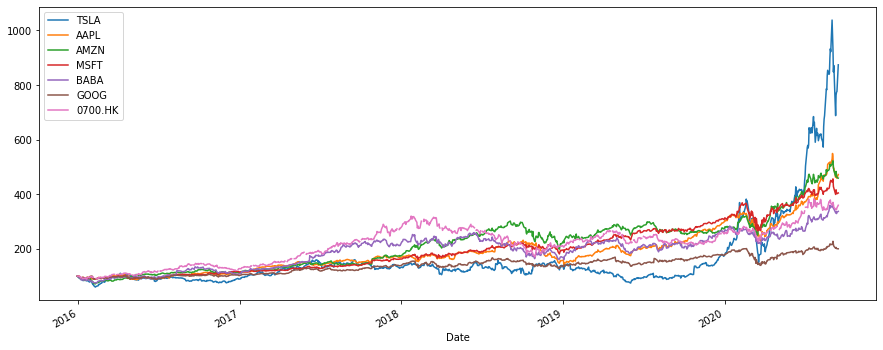

In [8]:
(mydata/mydata.iloc[0]*100).plot(figsize=(15,6))
plt.show()

Calculate returns of the portfolio

In [9]:
returns = (mydata/mydata.shift(1))-1
returns.head()

,TSLA,AAPL,AMZN,MSFT,BABA,GOOG,0700.HK
Date,,,,,,,
2015-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-04,-0.069164,0.000855,-0.057554,-0.012257,-0.056355,-0.022454,-0.000020
2016-01-05,0.000090,-0.025059,-0.005024,0.004562,0.025297,0.000998,-0.011402
2016-01-06,-0.019648,-0.019570,-0.001799,-0.018165,-0.016533,0.001400,-0.009498
2016-01-07,-0.015477,-0.042205,-0.039058,-0.034783,-0.059615,-0.023170,-0.039726


In [11]:
weights = np.array([0.20,0.20,0.20,0.10,0.10,0.10,0.10])

In [12]:
np.dot(returns,weights)

array([        nan, -0.03428114, -0.00405322, ..., -0.01554433,
       -0.00348832,  0.03443068])

In [13]:
annual_returns = returns.mean()*250
annual_returns

TSLA       0.622739
AAPL       0.372471
AMZN       0.367121
MSFT       0.334018
BABA       0.309316
GOOG       0.181052
0700.HK    0.355330
dtype: float64

In [14]:
np.dot(annual_returns, weights)

0.39043798176100886

In [15]:
pfolio_1 = str(round(np.dot(annual_returns, weights)*100, 5))+ ' %'

In [17]:
print(pfolio_1)

39.0438 %


In [18]:
weights_2 = np.array([0.15,0.15,0.15,0.15,0.10,0.10,0.15])

In [19]:
pfolio_2 = str(round(np.dot(annual_returns, weights_2)*100, 5))+ ' %'
print(pfolio_1)
print(pfolio_2)

39.0438 %
35.67888 %
